In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [48]:
lr <- read.csv("lr_pairs_day14R_radius30.csv")

In [49]:
lr <- lr[lr$LR_Score > 0.2,]
lr <- lr[lr$co_exp_count > 100,]

In [51]:
names(table(lr$sr_pair))

[1] "Fib-FR_PT"    "Fib-Immune"   "FR_PT-Fib"    "FR_PT-Immune" "Immune-Fib"  
[6] "Immune-FR_PT"

In [52]:
lr$LR_pair <- as.character(lr$LR_pair)

sr_pairs <- c('FR_PT-Fib','FR_PT-Immune','Fib-Immune','Fib-FR_PT','Immune-Fib','Immune-FR_PT')

select_all <- c()  

for (pair in sr_pairs) {
  lr_subset <- lr[lr$sr_pair == pair, ]
  
  n_to_select <- min(20, nrow(lr_subset))
  if (n_to_select > 0) {
    sorted_subset <- lr_subset[order(lr_subset$LR_Score, decreasing = TRUE), ]
    select <- sorted_subset$LR_pair[1:n_to_select]
    
    select_all <- c(select_all, select)
  }
}

In [53]:
select_all <- rev(unique(select_all))
lr <- lr[lr$LR_pair %in% select_all,]
lr$LR_pair <- factor(lr$LR_pair, levels = select_all)
lr <- lr %>% 
  distinct(Sender, Receiver, Ligand, Receptor, .keep_all = TRUE)

In [54]:
lr$Sender <- factor(lr$Sender, levels = c('FR_PT','Fib','Immune'))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


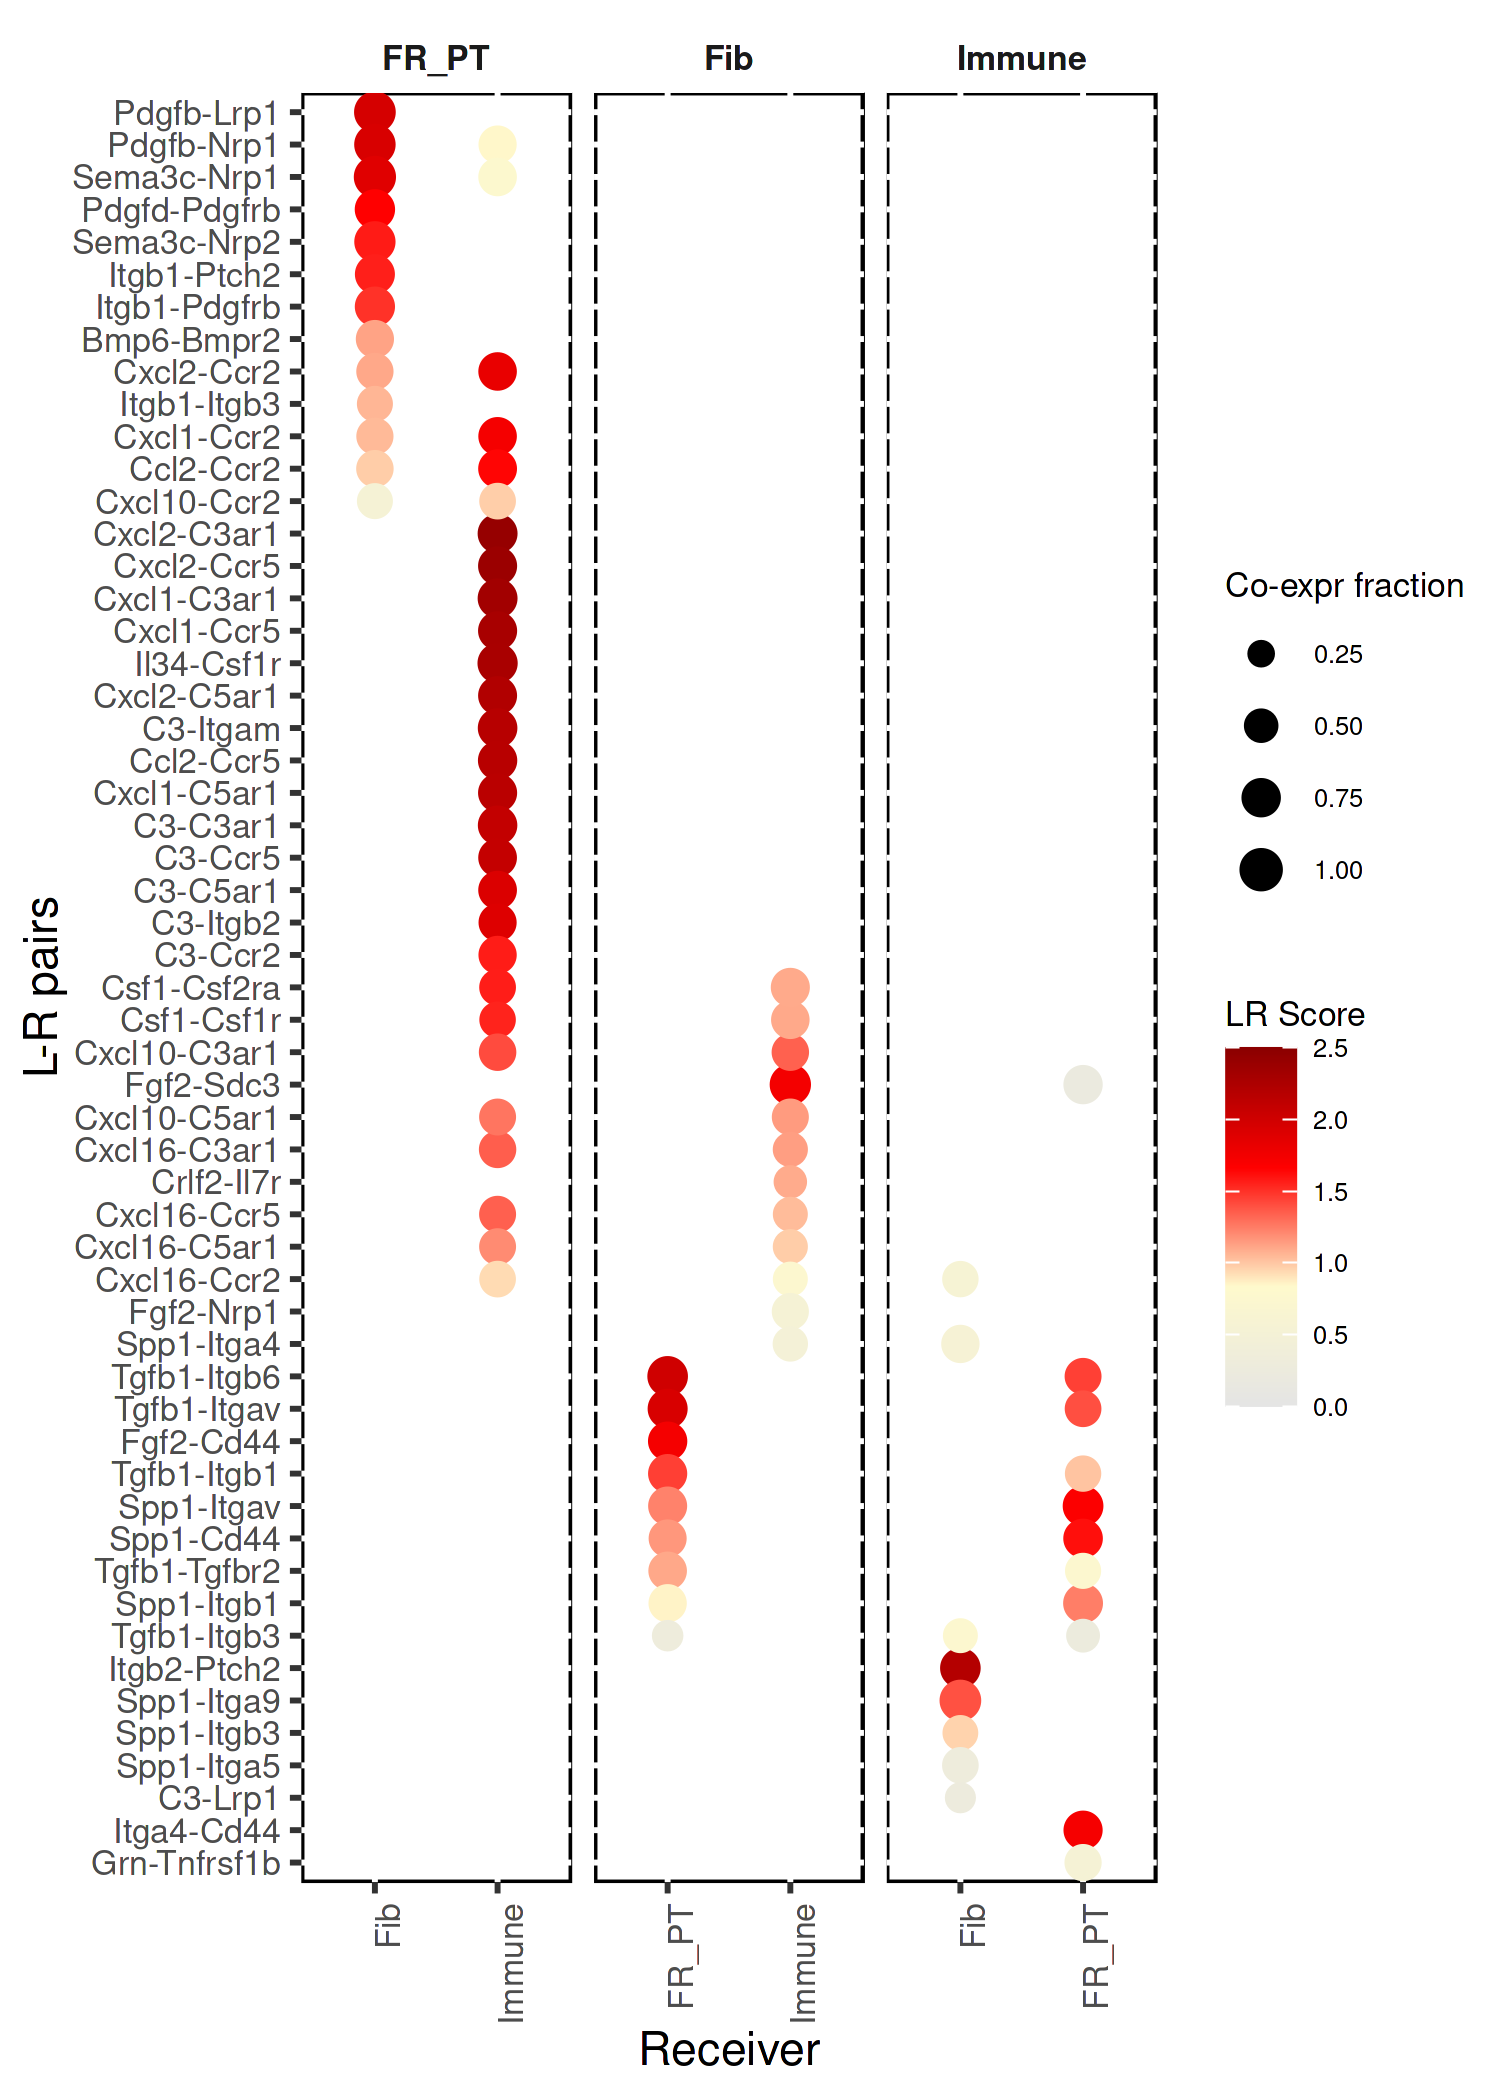

In [55]:
options(repr.plot.width = 5, repr.plot.height = 7, repr.plot.res = 300)

lr_pairs <- lr$LR_pair %>% unique()
color.palette <- colorRampPalette(c('#e5e5e5','lemonchiffon1','red','darkred'))(255)

font.size <- 8

my_plot <- lr %>% filter(LR_pair %in% lr_pairs) %>%
  ggplot(aes(x=Receiver, y=LR_pair, color=LR_score, size=exp_fraction)) + 
  geom_point() + 
  xlab("Receiver") +  
  ylab("L-R pairs") +  
  theme(panel.background = element_rect(fill="white", colour="black"),
        axis.text.x = element_text(angle=90, hjust=1, size=font.size),
        plot.title = element_text(size=(font.size+2), hjust=0.5, face='bold'),
        axis.text = element_text(size=font.size),
        legend.text = element_text(size=(font.size-2)),
        legend.title = element_text(size=font.size),
        strip.background = element_rect(fill="white"),
        strip.text = element_text(size=font.size, face="bold"),
        legend.position="right",
        legend.key = element_blank()) +  # Removes the legend frame
  facet_grid(~Sender, scales="free_x", space = "free_x") +
  scale_color_gradientn(colors=color.palette)+
  scale_color_gradientn(colors=color.palette, name="LR Score", limits = c(0, 2.5), oob = scales::squish)+ 
  scale_size(range = c(1, 4), name="Co-expr fraction", limits = c(0.1, 1))
my_plot